If you are using Google Colab, you may be interested in getting the Pro plan of Google Gemini and Colab for free: https://colab.research.google.com/signup

# Follow-up on regression example using Pytorch

You may have noticed that the neural network trained with Pytorch did not do a great job of modeling the data.
Let's go back and see if we can do better.

In [ ]:
#Adapted from https://medium.com/data-science/linear-regression-with-pytorch-eb6dedead817
import numpy as np
from matplotlib import pyplot as plt, rcParams
import torch
from torch.autograd import Variable

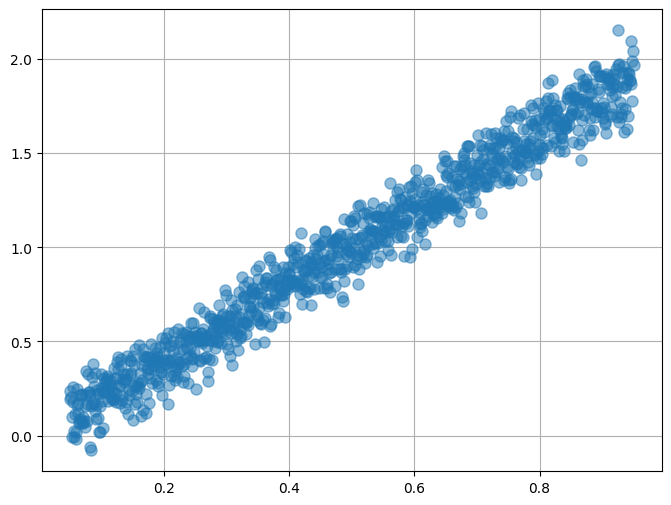

In [ ]:
# Initialize the training data parameters
N_train=1000
sigma_train=0.1;

# Train in the domain [0,1]
x=np.linspace(0.05,0.95,N_train)
# Produce Gaussian random noise
s = sigma_train*np.random.randn(N_train)

# Define linear relation with noise
y=2*x+s

fig = plt.figure(figsize=(8, 6))
plt.grid()
p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')
x_data = Variable(torch.Tensor([[xvalue] for xvalue in x]))
y_data = Variable(torch.Tensor([[yvalue] for yvalue in y]))

We had to change the training data type to work with `pytorch`.
In this case it really is important to check the shape of the dataset because we changed it from the original shape and type.

In [ ]:
class LinearRegressionModel(torch.nn.Module):

    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [ ]:
# Run this to create the model or reinitialize the model parameters
our_model = LinearRegressionModel()
criterion = torch.nn.MSELoss()

In [ ]:
# Rerun this if you change the learning rate lr
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.5)

In [ ]:
for epoch in range(50):

    # Forward pass: Compute predicted y by passing
    # x to the model
    pred_y = our_model(x_data)

    # Compute and print loss
    loss = criterion(pred_y, y_data)

    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 5.355365753173828
epoch 1, loss 0.6136634349822998
epoch 2, loss 0.25876492261886597
epoch 3, loss 0.2124236822128296
epoch 4, loss 0.18985678255558014
epoch 5, loss 0.17096202075481415
epoch 6, loss 0.15412722527980804
epoch 7, loss 0.1390521079301834
epoch 8, loss 0.12554742395877838
epoch 9, loss 0.11344920843839645
epoch 10, loss 0.10261096060276031
epoch 11, loss 0.09290143847465515
epoch 12, loss 0.0842030942440033
epoch 13, loss 0.07641063630580902
epoch 14, loss 0.06942970305681229
epoch 15, loss 0.06317581236362457
epoch 16, loss 0.05757321044802666
epoch 17, loss 0.052554093301296234
epoch 18, loss 0.048057686537504196
epoch 19, loss 0.04402954876422882
epoch 20, loss 0.04042091220617294
epoch 21, loss 0.037188105285167694
epoch 22, loss 0.03429196774959564
epoch 23, loss 0.03169745206832886
epoch 24, loss 0.029373131692409515
epoch 25, loss 0.02729087881743908
epoch 26, loss 0.025425482541322708
epoch 27, loss 0.023754354566335678
epoch 28, loss 0.0222572702914

The training concludes after a certain number of training epochs. Then we can evaluate the performance of the regression network on our dataset.

- Will it accurately predict the value of an in-training data point?
- Will it accurately predict the value of an out-of-training data point?


In [ ]:
new_var = Variable(torch.Tensor([[0.5]]))
pred_y = our_model(new_var)
print("predict (after training)", 0.5, our_model(new_var).item())

predict (after training) 0.5 1.005053997039795


In [ ]:
new_var = Variable(torch.Tensor([[2.0]]))
pred_y = our_model(new_var)
print("predict (after training)", 2.0, our_model(new_var).item())

predict (after training) 2.0 3.8260443210601807


You may be surprised that the fancy neural network package doesn't learn this simple function $y=2x$ very well!

What model has the NN learned? We can map it out by trying different points from the training sample and extrapolating.

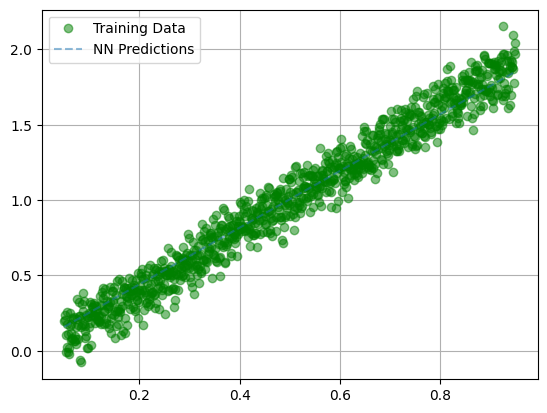

In [ ]:
predicted = our_model(x_data)

plt.plot(x_data, y_data, 'go', label='Training Data', alpha=0.5)
plt.plot(x_data, Variable(predicted), '--', label='NN Predictions', alpha=0.5)
plt.legend(loc='best')
plt.grid()
plt.show()

Let's think about this some more.


*   There should be plenty of training data for the NN to learn this simple function. (You could generate more data and check to see if performance improves.)
*   Does the number of training epochs matter? If the NN is trained for longer (more cycles) on the training data, will that help? (You could train for fewer or more epochs and see how the results improve.)

Here is a hint toward the solution: what happens if you have just 1 or 2 training epochs? What slope does the NN learn? Does this change as you increase the number of epochs? Can you guess what is the starting point for the slope of the learned linear function?

You can also increase the `lr` "learning rate" parameter and see if that helps the NN learn more quickly. We will discuss the meaning of this parameter in Lecture 3.

Now put all of what you have learned together to train the NN as best you can to learn the training data and generate a good regression value for points outside the training data.


# Introduction to linear Perceptron models

Here's an example for which we'd like the perceptron to distinguish between two different populations: one centered at $(-2,-2)$ and the other centered around $(2,2)$.

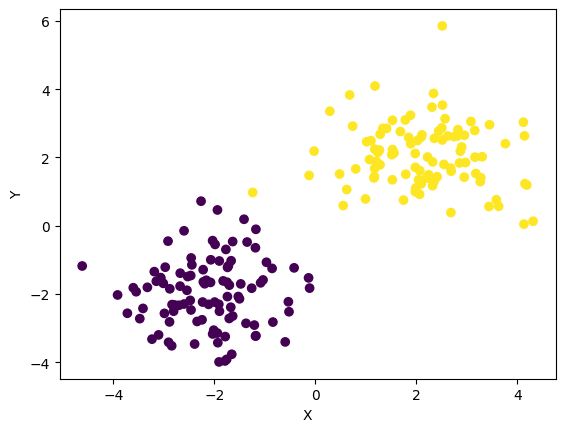

In [56]:
# Adapted from https://medium.com/@shashankshankar10/introduction-to-neural-networks-build-a-single-layer-perceptron-in-pytorch-c22d9b412ccf

import torch
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic linearly separable data
np.random.seed(42)
torch.manual_seed(42)

# Class 0: centered around (-2, -2)
class0 = np.random.randn(100, 2) + np.array([-2, -2])
labels0 = np.zeros(100)

# Class 1: centered around (2, 2)
class1 = np.random.randn(100, 2) + np.array([2, 2])
labels1 = np.ones(100)

# Combine data
XY_values = np.vstack([class0, class1])
label_values = np.hstack([labels0, labels1])

# Convert to tensors for Torch
XY = torch.FloatTensor(XY_values)
labels = torch.FloatTensor(label_values)

# Create a plot of X against Y
plt.scatter(XY_values[:, 0], XY_values[:, 1], c=label_values)

# Add X and Y labels to the plot
plt.xlabel('X')
plt.ylabel('Y')

# Display the plot
plt.show()


In [66]:
from torch import nn, optim
class SingleLayerPerceptron(nn.Module):
    def __init__(self, input_size, output_size):
        super(SingleLayerPerceptron, self).__init__()
        # Define the network with input_size and output_size
        # Linear layer performs: output = input @ weight.T + bias
        self.linear = nn.Linear(input_size, output_size)

#Define a Prediction Function
    def forward(self, x):
        return self.linear(x)

# Define the loss function (criterion)
def criterion(y_pred, y_true):
    # Binary Cross Entropy Loss
    # y_pred: predicted probabilities, y_true: true labels (0 or 1)

    # Compute the negative log likelihood loss using binary cross-entropy formula
    # (y * log(y_pred) + (1 - y) * log(1 - y_pred))
    loss = -1 * (y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))

    # Calculate the mean loss over the batch
    mean_loss = torch.mean(loss)

    return mean_loss


In [67]:
model = SingleLayerPerceptron(2, 1)

In [68]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

Epoch 0 done!


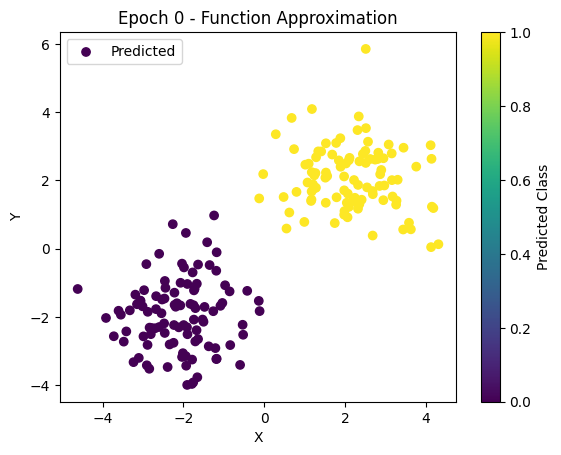

Epoch 2 done!


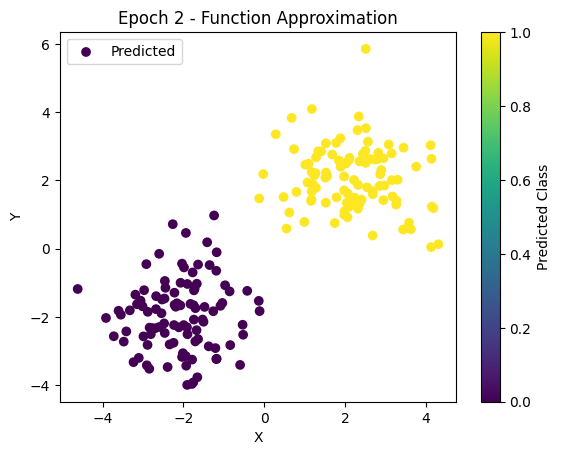

Epoch 4 done!


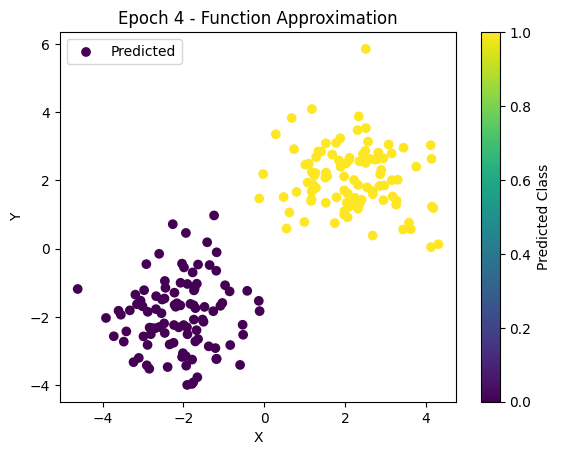

Epoch 6 done!


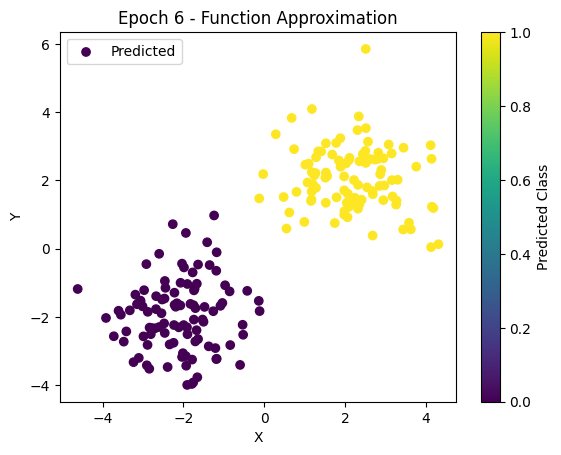

Epoch 8 done!


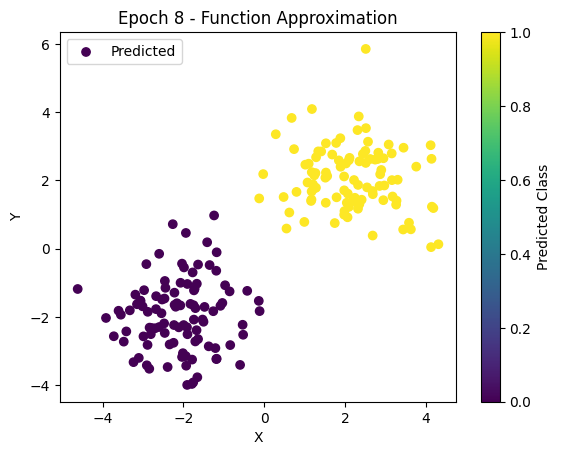

In [70]:
epochs = 10

for epoch in range(epochs):

    for x, y in zip(XY, labels):
        # Forward pass: Calculate the predicted output (yhat) using the model
        yhat = model(x)

        # Calculate the loss between the predicted output (yhat) and the actual target (y)
        loss = criterion(yhat, y)

        # Backpropagation: Compute gradients of the model parameters with respect to the loss
        loss.backward()

        # Update the model parameters using the computed gradients
        optimizer.step()

        # Zero out the gradients for the next iteration to avoid accumulation
        optimizer.zero_grad()

    if epoch % 2 == 0:
        print(f"Epoch {epoch} done!")

        # Plot the result of the function approximator
        predicted_values = model(XY).detach().numpy()
        plt.scatter(XY.numpy()[:, 0], XY.numpy()[:,1], c=(predicted_values>0), label='Predicted')  # Plot the predicted values
        plt.colorbar(label='Predicted Class')
        plt.legend()
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f'Epoch {epoch} - Function Approximation')
        plt.show()

This is an easy problem even for the single layer perceptron.

# Introduction to Multi-Layer Perceptron models

If we want to classify input vectors into 3 categories, then a simple linear binary perceptron is not enough.

In the next example, we will create a Multi-Layer Perceptron with a "hidden layer" comprised of 2 nodes ("neurons").

To keep things simple, we define the training data as follows:
The labels are assigned based on specific ranges of values in X, where
- elements less than or equal to -10 receive label 1.0,
- elements between -10 and 10 (exclusive) receive label 0.5, and
- elements greater than 10 receive label 0.

The goal of the MLP will be to learn these classification categories and correctly assign an input value $x$ to the category index $y$.

In [ ]:
# Adapted from https://medium.com/@shashankshankar10/introduction-to-neural-networks-build-a-single-layer-perceptron-in-pytorch-c22d9b412ccf

import torch
import matplotlib.pyplot as plt

# Generate synthetic data for X ranging from -30 to 29 with a step size of 1
X = torch.arange(-30, 30, 1).view(-1, 1).type(torch.FloatTensor)

# Initialize an empty tensor Y to store the labels (target values)
Y = torch.zeros(X.shape[0])

# Assign label 1.0 to elements in Y where the corresponding X value is greater than 0
Y[X[:, 0] <= -10] = 1.0

# Assign label 0.5 to elements in Y where the corresponding X value falls between -10 and 10 (exclusive)
Y[(X[:, 0] > -10) & (X[:, 0] < 10)] = 0.5

# Assign label 0 to elements in Y where the corresponding X value is greater than 10
Y[X[:, 0] > 10] = 0

# Create a plot of X against Y
plt.plot(X, Y)

# Add X and Y labels to the plot
plt.xlabel('X')
plt.ylabel('Y')

# Display the plot
plt.show()

In [ ]:
from torch import nn, optim
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_size, hidden_neurons, output_size):
        super(MultiLayerPerceptron, self).__init__()
        # Define the hidden layer with input_size input features and hidden_neurons neurons
        self.hidden_layer = nn.Linear(input_size, hidden_neurons)

        # Define the output layer with hidden_neurons input features and output_size neurons
        self.output_layer = nn.Linear(hidden_neurons, output_size)

#Define a Prediction Function
    def forward(self, x):
        # Pass the input through the hidden layer and apply the sigmoid activation function
        hidden_output = torch.sigmoid(self.hidden_layer(x))

        # Pass the hidden layer output through the output layer and apply the sigmoid activation function
        y_pred = torch.sigmoid(self.output_layer(hidden_output))

        return y_pred

# Define the loss function (criterion)
def criterion(y_pred, y_true):
    # Binary Cross Entropy Loss
    # y_pred: predicted probabilities, y_true: true labels (0 or 1)

    # Compute the negative log likelihood loss using binary cross-entropy formula
    # (y * log(y_pred) + (1 - y) * log(1 - y_pred))
    loss = -1 * (y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))

    # Calculate the mean loss over the batch
    mean_loss = torch.mean(loss)

    return mean_loss


In [ ]:
model = MultiLayerPerceptron(1, 2, 1)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# Define the training loop
epochs = 5000

for epoch in range(epochs):
    epoch = epoch + 1  # Increment the epoch count

    for x, y in zip(X, Y):
        # Forward pass: Calculate the predicted output (yhat) using the model
        yhat = model(x)

        # Calculate the loss between the predicted output (yhat) and the actual target (y)
        loss = criterion(yhat, y)

        # Backpropagation: Compute gradients of the model parameters with respect to the loss
        loss.backward()

        # Update the model parameters using the computed gradients
        optimizer.step()

        # Zero out the gradients for the next iteration to avoid accumulation
        optimizer.zero_grad()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} done!")  # Print status after every 1000 epochs

        # Plot the result of the function approximator
        predicted_values = model(X).detach().numpy()
        plt.plot(X.numpy(), predicted_values)  # Plot the predicted values
        plt.plot(X.numpy(), Y.numpy(), 'm')  # Plot the ground truth data (Y)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend(['Predicted', 'Ground Truth'])
        plt.title(f'Epoch {epoch} - Function Approximation')
        plt.show()

# Example of MLP learning XOR

This is an implementation of a simple MLP learning the XOR logical function.
We need a hidden layer to learn this function, and we need a


In [ ]:
# XOR truth table as training data
X = torch.tensor([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]], dtype=torch.float32)

y = torch.tensor([[0],
                  [1],
                  [1],
                  [0]], dtype=torch.float32)

In [ ]:
from torch import nn, optim
class XOR_MLP(nn.Module):
    def __init__(self, hidden_size=2):
        super(XOR_MLP, self).__init__()
        # Hidden layer: transforms 2 inputs into hidden_size features
        self.hidden = nn.Linear(2, hidden_size)
        # Output layer: combines hidden features into 1 output
        self.output = nn.Linear(hidden_size, 1)
        # Activation function for non-linearity
        self.activation = nn.ReLU()

    def forward(self, x):
        # Pass through hidden layer with activation
        h = self.activation(self.hidden(x))
        # Pass through output layer with activation
        y = torch.sigmoid(self.output(h))
        return y

In [ ]:
model = XOR_MLP(hidden_size=2)
print("Model architecture:")
print(model)
print()

Model architecture:
XOR_MLP(
  (hidden): Linear(in_features=2, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=1, bias=True)
  (activation): ReLU()
)



In [ ]:
criterion = nn.BCELoss()  # Binary Cross Entropy for binary classification
optimizer = optim.SGD(model.parameters(), lr=1.0)

In [ ]:
epochs = 500
for epoch in range(epochs):
    # Forward pass: compute predictions
    predictions = model(X)

    # Compute loss
    loss = criterion(predictions, y)

    # Backward pass: compute gradients
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()        # Compute new gradients

    # Update weights
    optimizer.step()

    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [100/500], Loss: 0.0328
Epoch [200/500], Loss: 0.0117
Epoch [300/500], Loss: 0.0069
Epoch [400/500], Loss: 0.0049
Epoch [500/500], Loss: 0.0037


Decision boundary saved as 'xor_boundary.png'


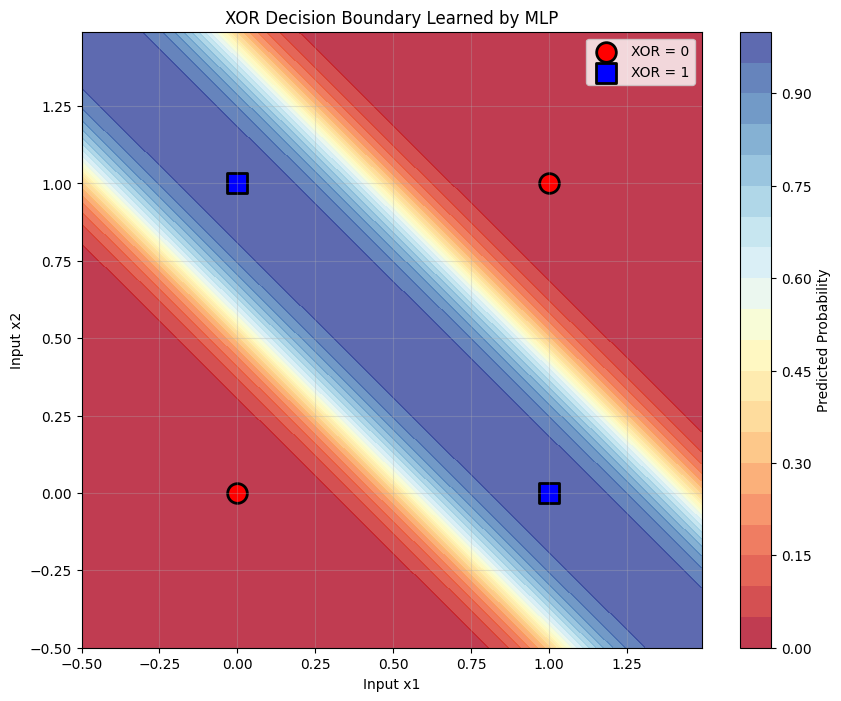

In [ ]:
# Visualize decision boundary
def plot_decision_boundary(model):
    # Create a mesh grid
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, h),
                            torch.arange(y_min, y_max, h),
                            indexing='ij')

    # Predict for each point in the mesh
    grid_points = torch.stack([xx.flatten(), yy.flatten()], dim=1)
    with torch.no_grad():
        Z = model(grid_points)
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx.numpy(), yy.numpy(), Z.numpy(), levels=20, cmap='RdYlBu', alpha=0.8)
    plt.colorbar(label='Predicted Probability')

    # Plot the actual XOR points
    for i in range(len(X)):
        color = 'red' if y[i].item() == 0 else 'blue'
        marker = 'o' if y[i].item() == 0 else 's'
        plt.scatter(X[i, 0].item(), X[i, 1].item(),
                   c=color, marker=marker, s=200,
                   edgecolors='black', linewidths=2,
                   label=f'XOR = {int(y[i].item())}' if i < 2 else '')

    plt.xlabel('Input x1')
    plt.ylabel('Input x2')
    plt.title('XOR Decision Boundary Learned by MLP')
    plt.legend()
    plt.grid(True, alpha=0.3)
    print("Decision boundary saved as 'xor_boundary.png'")

plot_decision_boundary(model)

In [ ]:
# Show learned weights
print("\n" + "="*40)
print("LEARNED WEIGHTS AND BIASES")
print("="*40)
print("\nHidden layer weights:")
print(model.hidden.weight.data)
print("\nHidden layer biases:")
print(model.hidden.bias.data)
print("\nOutput layer weights:")
print(model.output.weight.data)
print("\nOutput layer biases:")
print(model.output.bias.data)


LEARNED WEIGHTS AND BIASES

Hidden layer weights:
tensor([[-2.6438, -2.6438],
        [ 2.6767,  2.6767]])

Hidden layer biases:
tensor([ 2.6268, -2.6745])

Output layer weights:
tensor([[-4.4292, -4.3772]])

Output layer biases:
tensor([5.1137])
